<a href="https://colab.research.google.com/github/YasminForestti/Processo-seletivo-Analytica-2022/blob/main/Obten%C3%A7%C3%A3o_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1)** Importação das bibliotecas

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
colors=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]

## **2)** Baixando os Bancos de Dados
Os banco de dados foram baixados e colocados no ambiente do Colab

##**3)** Primeiro Contato com os Bancos de Dados

In [39]:
brasil = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/brasil.csv")
grupo_lgbtqia = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/grupo_lgbtqia.csv")

In [27]:
brasil.head()

,ano,homicidios
0,2000,130
1,2001,132
2,2002,126
3,2003,125
4,2004,158


In [40]:
grupo = grupo_lgbtqia
grupo_lgbtqia.head()

,ano,grupo,homicidios,prop_homicidios_total
0,2020,Gay,51.0,NaN
1,2020,Trans ou Travesti,164.0,NaN
2,2020,Travesti,NaN,NaN
3,2020,Lésbica,10.0,NaN
4,2020,Transsexual,NaN,NaN


In [59]:
Replace_mapping_dict = {
    'Travesti':'Trans',
    'Transsexual':'Trans',
    'Trans ou Travesti':'Trans'
}

grupo_lgbtqia['grupo']=grupo_lgbtqia['grupo'].replace(Replace_mapping_dict)

In [90]:
filtro =  np.invert(grupo_lgbtqia['homicidios'] >= 0)
grupo_NaN = grupo_lgbtqia[filtro]
grupo_NaN = grupo_NaN.groupby(by = ['grupo','ano']).sum()
grupo_NaN = grupo_NaN.drop(columns = ['homicidios','prop_homicidios_total'])
grupo_NaN

Empty DataFrame
Columns: []
Index: [(Bissexual, 2015), (Gay, 2015), (Lésbica, 2015), (Trans, 2011), (Trans, 2012), (Trans, 2013), (Trans, 2014), (Trans, 2015), (Trans, 2016), (Trans, 2017), (Trans, 2018), (Trans, 2020)]

In [ ]:
filtro = grupo_lgbtqia['homicidios'] > 0
grupo_lgbtqia = grupo_lgbtqia[filtro]
grupo_soma_homicidios = grupo_lgbtqia.groupby(by = 'grupo').sum()

,ano,homicidios,prop_homicidios_total
grupo,,,
Bissexual,16129,32.0,5.42
Gay,18140,1482.0,191.99
Lésbica,18140,201.0,35.83
Trans,24193,1489.0,232.54


In [ ]:
grupo_soma_homicidios= grupo_soma_homicidios.drop(columns = ['ano','prop_homicidios_total'])
grupo_soma_homicidios

,homicidios
grupo,
Bissexual,32.0
Gay,1482.0
Lésbica,201.0
Trans,1489.0


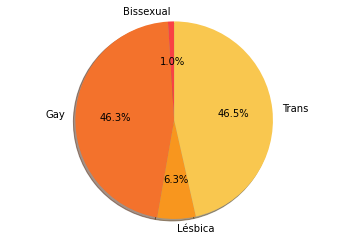

In [ ]:
labels = ['Bissexual', 'Gay','Lésbica','Trans']
tam = grupo_soma_homicidios['homicidios'].tolist()
ax = plt.subplot()
ax.pie(tam,labels=labels,autopct = '%1.1f%%',startangle = 90,colors=colors,shadow = True)
ax.axis('equal')
plt.show()